we have new languages and we want to analyze them
- first we'd want to take the floored values of the universals - so that it will give as a binary scores for universal existance
- then, we'd want to calculate the percentage of quantifiers with the universal for each length:
- - so I will go through the numbers, and do sum/count, store it for lagnuage:len:uni-name
- - we can do sub-titles for languages


In [1]:
import pandas as pd
import numpy as np

In [2]:
with open("langs20-09.txt") as f:
    result = open("langs20-09_names.txt",'w') 
    for l in f.readlines():
        l = l[l.find("=")+1:l.find("-")]
        if len(l)>0 and (l[-1] == "S" or l[-1] == "I"):
            result.write(l+"\n")
    result.close()

In [3]:
with open("langs20-09_names.txt") as r:
    langs = []
    for l in r.readlines():
        langs += [l.split()[0]]

In [4]:
langsRaw = ['entail0neg',
 'entail0neg_entail',
 'nand',
 'neg_entail0neg',
 'entail0neg_iff',
 'neg_entail0iff',
 'nor',
 'or0neg',
 'and0neg']
langs = [l+'N' for l in langsRaw]
langs += [l+'I' for l in langsRaw]
langs += [l+'S' for l in langsRaw]

In [5]:
path1 = r"C:\Users\mimis\Desktop\QuantifierComplexity-master\results\Language="
path21 = r"-max_model_size=8\2022-09-21\csv\2022-09-21\language="
path20 = r"-max_model_size=8\2022-09-20\csv\2022-09-20\language="
path22 = r"-max_model_size=8\2022-09-22\csv\2022-09-22\language="
path3 = "-max_model_size=8-max-expr-len="

langs_dfs = {}
n9=0
n8=0
for l in langs:
    try:
        langs_dfs[l] = pd.read_csv(path1+l+path21+l+path3+"10.csv")
        n9+=1
    except:
        try:
            langs_dfs[l] = pd.read_csv(path1+l+path22+l+path3+"9.csv")
            n8+=1
        except:
            print(l)


In [6]:
for name,df in langs_dfs.items():
    df["bin-monotonicity"] = np.floor(df.monotonicity)
    df["bin-conservativity"] = np.floor(df.conservativity)
    df["bin-both"] = [int(bool(x) & bool(y)) for (x,y) in zip(df["bin-monotonicity"],df["bin-conservativity"])]
    
    langs_dfs[name] = df.drop(df[df.uniformity==1].index)

In [7]:
table_2 = {}
for name,df in langs_dfs.items():
    df["len_normalized"] = (df.expr_length - df.expr_length.mean()) / df.expr_length.std()
    table_2[name] = {
    "avg_mono_yes" : df[df["bin-monotonicity"] == 1].len_normalized.mean(),
    "avg_mono_no" : df[df["bin-monotonicity"] == 0].len_normalized.mean(),
    "avg_cons_yes" : df[df["bin-conservativity"] == 1].len_normalized.mean(),
    "avg_cons_no" : df[df["bin-conservativity"] == 0].len_normalized.mean(),
    "avg_both_yes" : df[df["bin-both"] == 1].len_normalized.mean(),
    "avg_both_no" : df[df["bin-both"] == 0].len_normalized.mean()
    }
        


In [8]:
table_2

{'entail0negN': {'avg_mono_yes': -0.8563672148415848,
  'avg_mono_no': 0.31996137697377913,
  'avg_cons_yes': -1.0251677302590365,
  'avg_cons_no': 0.12930043444708575,
  'avg_both_yes': -1.3910428474263623,
  'avg_both_no': 0.12096024760229246},
 'entail0neg_entailN': {'avg_mono_yes': -0.8536260618095493,
  'avg_mono_no': 0.3154705011035285,
  'avg_cons_yes': -0.9502785610660496,
  'avg_cons_no': 0.11878482013325597,
  'avg_both_yes': -1.3463059810965314,
  'avg_both_no': 0.11606086043935593},
 'nandN': {'avg_mono_yes': -0.7298188385137531,
  'avg_mono_no': 0.2726795660381055,
  'avg_cons_yes': -0.9266350440469763,
  'avg_cons_no': 0.11687288843835769,
  'avg_both_yes': -1.1232483462755263,
  'avg_both_no': 0.09767376924135038},
 'neg_entail0negN': {'avg_mono_yes': -0.8300965139923664,
  'avg_mono_no': 0.31014595028286224,
  'avg_cons_yes': -1.0280140307171257,
  'avg_cons_no': 0.12965942729765537,
  'avg_both_yes': -1.3903553305670693,
  'avg_both_no': 0.12090046352757111},
 'entail0

now we have the binary values. we need to create a df for all the percentages: we need to check how to make sub-indices for diffeent languages so that all the languages will be in the same df and we could have variance plots.

have a glance at the plots we did earlier and make sure the df will be in a similar form.

In [7]:
mono_tab = pd.DataFrame(index=langs)
cons_tab = pd.DataFrame(index=langs)
both_tab = pd.DataFrame(index=langs)

In [8]:
universals = ["monotonicity","conservativity","both"]
uni_dfs = [mono_tab,cons_tab,both_tab]

In [9]:
for name,df in langs_dfs.items():
    for i in range(1,21):
        if max(df.expr_length.astype('str').str.contains(str(i)))==1:
            for u,d in zip(universals,uni_dfs):
                tot=len(df[df.expr_length == i])
                cnt=sum(df["bin-"+u][df.expr_length == i])
                try:
                    perc = cnt/tot
                except:
                    print(name)
                    print(i)
                
                #enter the perc to the right column
                d.loc[name,i] = perc            

norN
5
norN
5
norN
5
nandI
6
nandI
6
nandI
6


In [10]:
mono_cnt_tab = pd.DataFrame(index=langs)
cons_cnt_tab = pd.DataFrame(index=langs)
both_cnt_tab = pd.DataFrame(index=langs)
uni_cnt_dfs = [mono_cnt_tab,cons_cnt_tab,both_cnt_tab]

In [11]:
for name,df in langs_dfs.items():
    for i in range(1,21):
       
        if (max(df.expr_length.astype('str').str.contains(str(i)))!=1):
            continue
        for u,d in zip(universals,uni_cnt_dfs):
            tot=len(df[df.expr_length == i])
            cnt=sum(df["bin-"+u][df.expr_length == i])
            try:
                perc = cnt/tot
            except:
                print(name)
                print(i)
                tot = None
            d.loc[name,i] = (tot)  


norN
5
norN
5
norN
5
nandI
6
nandI
6
nandI
6


In [12]:
mono_tab

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
entail0negN,0.0,0.75,1.000000,1.000000,0.571429,0.300000,0.333333,0.400000,0.285714,0.214286,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
entail0neg_entailN,0.0,1.00,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,NaN,NaN
nandN,0.0,1.00,0.666667,0.000000,1.000000,0.500000,0.333333,0.500000,0.214286,0.428571,0.222222,0.111111,0.111111,0.000000,0.090909,0.000000,0.000000,0.0,NaN,0.0
neg_entail0negN,0.0,0.75,1.000000,1.000000,0.428571,0.500000,0.444444,0.363636,0.307692,0.142857,0.076923,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0
entail0neg_iffN,0.0,1.00,0.500000,0.800000,0.500000,0.250000,0.352941,0.083333,0.142857,0.125000,0.115385,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neg_entail0iffN,0.0,1.00,0.000000,0.750000,0.428571,0.000000,0.275862,0.083333,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
norN,0.0,1.00,0.000000,1.000000,0.600000,1.000000,0.500000,0.400000,0.600000,0.400000,0.444444,NaN,0.363636,0.200000,0.375000,0.166667,0.142857,0.1,0.0,0.0
or0negN,0.0,0.75,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,0.230769,0.214286,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0
and0negN,0.0,0.75,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
entail0negI,0.0,0.75,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0


In [27]:
cons_cnt_tab["sum"] = cons_cnt_tab[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]].sum(axis=1)

In [22]:
col_list = cons_cnt_tab.columns

In [23]:
col_list

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       'sum'],
      dtype='object')

In [28]:
cons_cnt_tab

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,sum
entail0negN,1.0,4.0,5.0,4.0,7.0,10.0,9.0,10.0,14.0,14.0,...,9.0,8.0,8.0,6.0,2.0,2.0,1.0,1.0,1.0,125.0
entail0neg_entailN,1.0,5.0,1.0,9.0,8.0,6.0,28.0,14.0,4.0,26.0,...,4.0,8.0,NaN,4.0,2.0,NaN,2.0,NaN,NaN,126.0
nandN,1.0,3.0,3.0,3.0,6.0,4.0,9.0,8.0,14.0,14.0,...,9.0,9.0,7.0,11.0,6.0,3.0,5.0,NaN,1.0,125.0
neg_entail0negN,1.0,4.0,5.0,2.0,7.0,10.0,9.0,11.0,13.0,14.0,...,12.0,6.0,4.0,5.0,4.0,3.0,1.0,NaN,1.0,125.0
entail0neg_iffN,1.0,4.0,2.0,10.0,10.0,8.0,17.0,24.0,14.0,8.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0
neg_entail0iffN,1.0,5.0,1.0,12.0,14.0,3.0,29.0,24.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
norN,1.0,3.0,1.0,5.0,NaN,2.0,2.0,5.0,5.0,5.0,...,NaN,11.0,5.0,8.0,12.0,7.0,10.0,3.0,7.0,101.0
or0negN,1.0,4.0,5.0,2.0,2.0,7.0,10.0,7.0,5.0,8.0,...,14.0,8.0,3.0,7.0,8.0,8.0,6.0,NaN,2.0,120.0
and0negN,1.0,4.0,5.0,3.0,8.0,13.0,7.0,7.0,17.0,17.0,...,7.0,13.0,6.0,4.0,2.0,1.0,1.0,1.0,1.0,126.0
entail0negI,1.0,4.0,5.0,4.0,7.0,10.0,11.0,16.0,16.0,11.0,...,9.0,5.0,4.0,4.0,2.0,1.0,1.0,NaN,1.0,125.0


In [336]:
import matplotlib.pyplot as plt
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 3.5, len(langs)))

In [471]:
third_ops = {"subset":"S",
             "identity":"I",
             "non-identity":"N"}

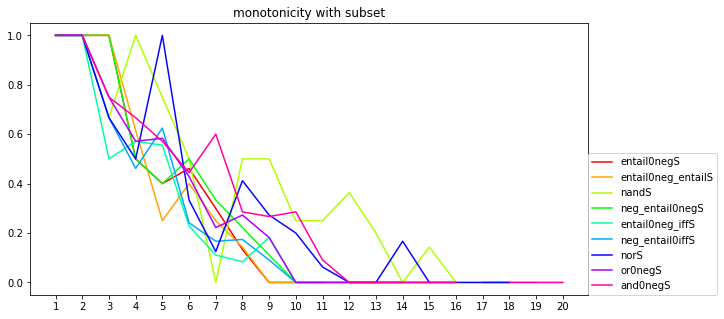

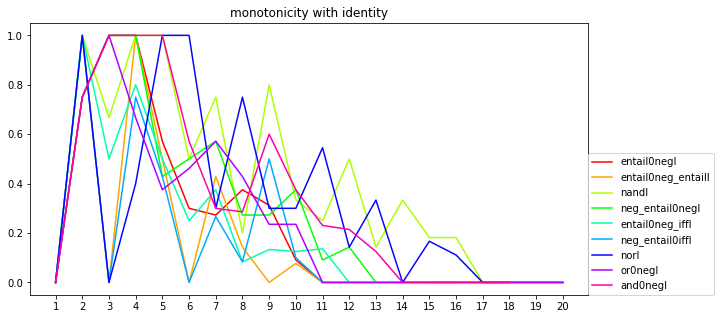

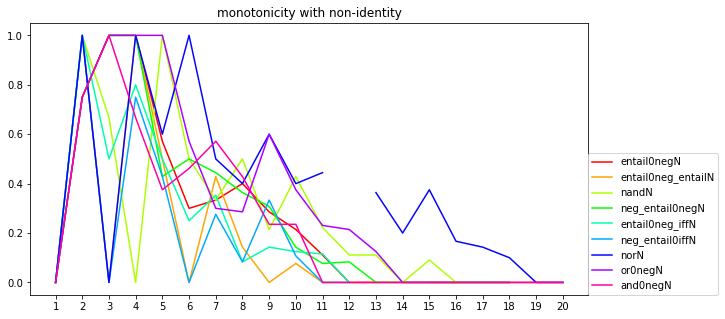

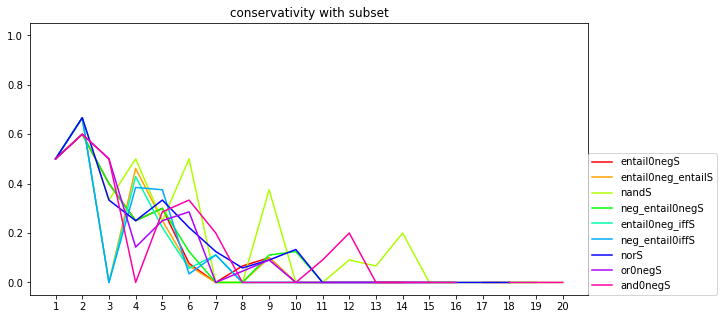

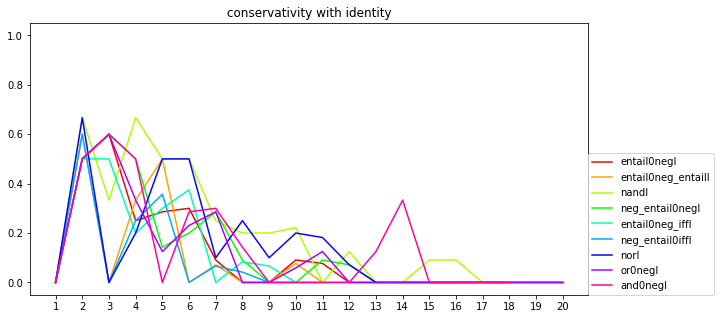

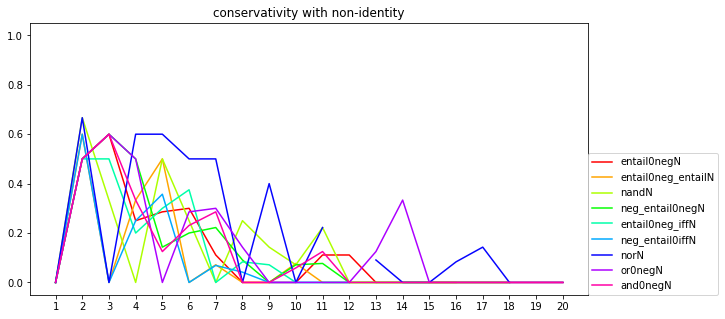

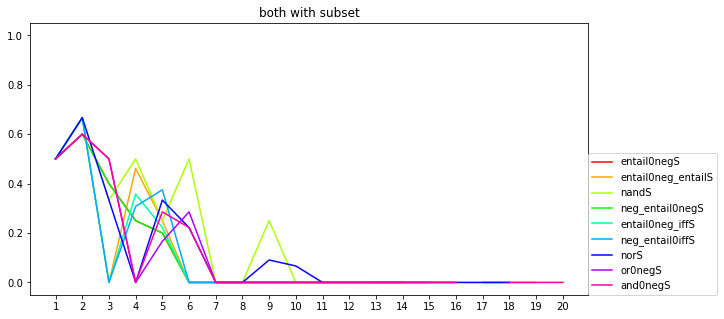

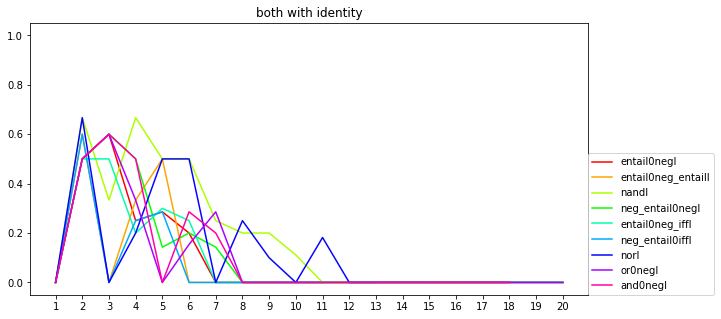

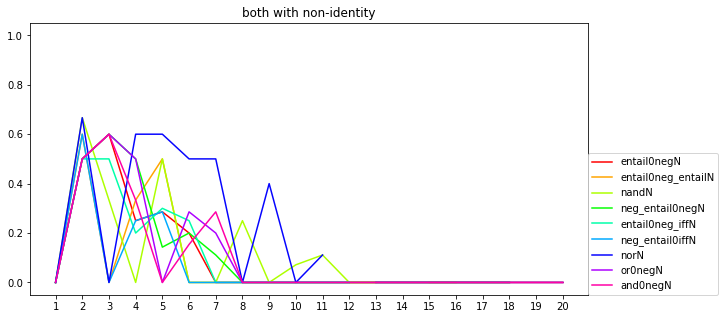

In [497]:
for u,d in zip(universals,uni_dfs):
    for name,sfx in third_ops.items():
        ax = d[d.index.str[-1]==sfx].transpose().plot(color=colors)
        ax.scatter(1,1,c='w')
        lgd = ax.legend(loc=(1,0))
        fig = plt.gcf()
        title = u+" with "+name
        ax.set_title(title)
        plt.xticks(list(range(1,21)))
        fig.set_size_inches((10,5))
        fig.savefig("fil "+title, bbox_extra_artists=(lgd,), bbox_inches='tight')

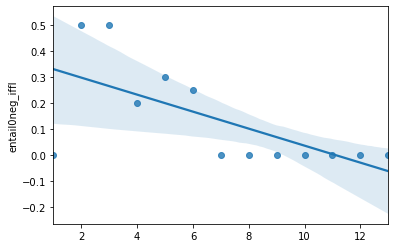

In [527]:
import seaborn as sns
reg = sns.regplot(x=d.transpose().index,y=d.transpose()[langs[13]],fit_reg=True)

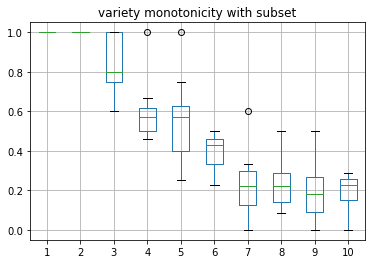

In [385]:
ax = mono_no_opp_tab[mono_no_opp_tab.index.str[-1]=="S"].boxplot()
fig = plt.gcf()
title = "variety monotonicity with subset"
ax.set_title(title)
fig.savefig(title+".png")

change here I to S in order to show the difference between subset and identity and how it affects percentage of monotonicity

In [530]:
import sklearn.metrics


In [538]:
mono_tab_no_nan = mono_tab.fillna(0)

In [539]:
mono_tab_no_nan

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
entail0negN,0.0,0.75,1.000000,1.000000,0.571429,0.300000,0.333333,0.400000,0.285714,0.214286,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
entail0neg_entailN,0.0,1.00,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
nandN,0.0,1.00,0.666667,0.000000,1.000000,0.500000,0.333333,0.500000,0.214286,0.428571,0.222222,0.111111,0.111111,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0
neg_entail0negN,0.0,0.75,1.000000,1.000000,0.428571,0.500000,0.444444,0.363636,0.307692,0.142857,0.076923,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
entail0neg_iffN,0.0,1.00,0.500000,0.800000,0.500000,0.250000,0.352941,0.083333,0.142857,0.125000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
neg_entail0iffN,0.0,1.00,0.000000,0.750000,0.428571,0.000000,0.275862,0.083333,0.333333,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
norN,0.0,1.00,0.000000,1.000000,0.600000,1.000000,0.500000,0.400000,0.600000,0.400000,0.444444,0.000000,0.363636,0.200000,0.375000,0.166667,0.142857,0.1,0.0,0.0
or0negN,0.0,0.75,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,0.230769,0.214286,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
and0negN,0.0,0.75,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
entail0negI,0.0,0.75,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


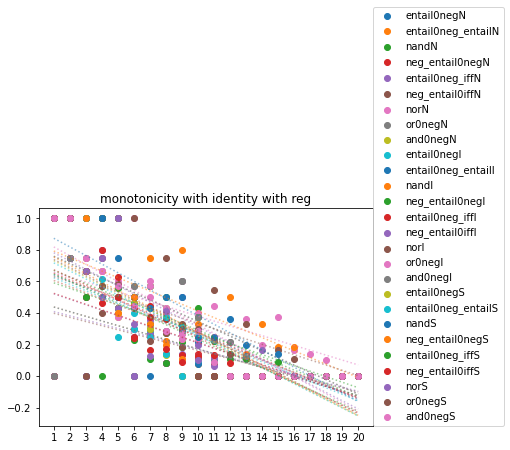

In [571]:
import scipy.stats
mse_values = {}
ttest = []
for x in range(len(mono_tab_no_nan)):
    title = mono_tab_no_nan.index[x]
    x_plot = list(range(1,21))
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in mono_tab_no_nan[x_plot].iloc[x]]
    
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 20, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
    mse_values[title] = sklearn.metrics.mean_squared_error(y_plot,ry)
    
lgd = plt.legend(loc=(1,0))
plt.xticks(x_plot)
ax = plt.gca()
title = "monotonicity with identity with reg"
ax.set_title(title)
plt.savefig("LLLLL"+title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    

In [579]:
s_avg = 0
i_avg = 0
n_avg = 0
mse_values_s = {}
mse_values_i = {}
mse_values_n = {}
for name,mse in mse_values.items():
    if name[:-1]=="entail0neg_iff" or name[:-1]=="neg_entail0iff":
        continue
    if name[-1]=="I":
        mse_values_i[name] = mse
        i_avg += mse
    if name[-1]=="S":
        mse_values_s[name] = mse
        s_avg += mse
    if name[-1]=="N":
        mse_values_n[name] = mse
        n_avg += mse
print("N: ")
print(n_avg/7)
print("S: ")
print(s_avg/7)
print("I: ")
print(i_avg/7)

N: 
0.05873495951858104
S: 
0.032456133791416285
I: 
0.06107192315452933


we can see here that of course the regression is more accurate to subset

In [587]:
import scipy

to20 = scipy.stats.ttest_ind(list(mse_values_i.values()),list(mse_values_s.values()))

In [588]:
to20


Ttest_indResult(statistic=4.58067566795069, pvalue=0.000631693694633027)

In [591]:
mse_values_n

{'entail0negN': 0.05093054838058865,
 'entail0neg_entailN': 0.06920086451184113,
 'nandN': 0.06073870676688599,
 'neg_entail0negN': 0.04955739514931263,
 'norN': 0.07826479418362932,
 'or0negN': 0.0595590902730047,
 'and0negN': 0.04289331736480488}